# Titanic ML Model Practice

Predicting which passengers survived the Titanic shipwreck. 

## The Challenege 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

## Data Background/Usage

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived. 

## Features

**Data Dictionary (Train/Test)**

1. PassengerId
2. Survived - (0 = No, 1 = Yes)
    * `Train.csv` only 
3. Pclass - Ticket Class ( 1 = 1st, 2 = 2nd, 3 = 3rd)
    *  A proxy for socio-economic status (SES)
        * 1st = Upper
        * 2nd = Middle
        * 3rd = Lower
4. Name
5. Sex 
6. Age - Age in years
    * Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
7. SibSp - # of siblings / spouses aboard the Titanic
    * The dataset defines family relations in this way...
        * Sibling = brother, sister, stepbrother, stepsister
        * Spouse = husband, wife (mistresses and fiancés were ignored)
8. Parch - # of parents / children aboard the Titanic
    * parch: The dataset defines family relations in this way...
        * Parent = mother, father
        * Child = daughter, son, stepdaughter, stepson
        * Some children travelled only with a nanny, therefore parch=0 for them.
9. Ticket - Ticket number
10. Fare - Passenger fare
11. Cabin - Cabin number
12. Embarked - Port of Embarkation | (C = Cherbourg, Q = Queenstown, S = Southampton)

## Notebook Imports

In [1]:
#EDA tools 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Modeling 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Data Manipulation/wrangaling 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Evaluation Metrics

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Save images to workbook
%matplotlib inline

## Gather Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((891, 12), (418, 11))

## Data Exploration (exploratory data analysis or EDA)

Let's review some of the featuresI assumed are important 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Count of each class
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

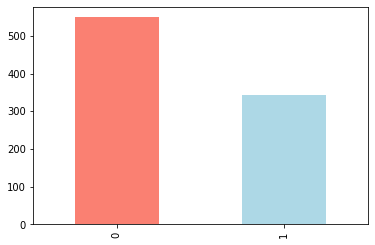

In [6]:
train["Survived"].value_counts().plot(kind='bar', color=["salmon", 'lightblue']);

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [8]:
#Central Tendencies
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check for missing values

In [9]:
#Are there any missing values
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
#Cumulative total of missing values by column
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Drop Cabin feature due to 60% missing values
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

In [12]:
#Cumulative total of missing values by column
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


## Data Visualizations

### Survived class by Sex

In [14]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
#compare the survived column with sex column
pd.crosstab(train.Survived, train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


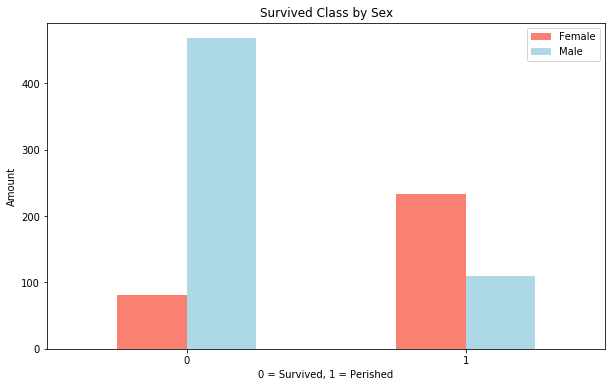

In [16]:
#create a plot of crosstab
pd.crosstab(train.Survived, train.Sex).plot(kind='bar',
                                           figsize=(10,6),
                                           color=["salmon", "lightblue"])
plt.title("Survived Class by Sex")
plt.xlabel("0 = Survived, 1 = Perished")
plt.ylabel("Amount")
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

### Pclass frequency by Sex

In [17]:
#Pclass by Sex
pd.crosstab(train.Pclass, train.Sex)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


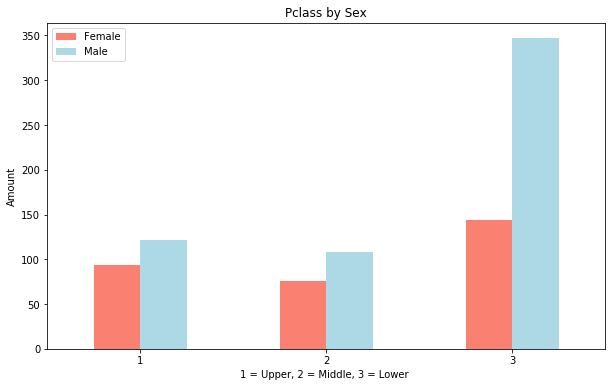

In [18]:
pd.crosstab(train.Pclass, train.Sex).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['salmon', 'lightblue'])

plt.title("Pclass by Sex")
plt.xlabel("1 = Upper, 2 = Middle, 3 = Lower ")
plt.ylabel("Amount")
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

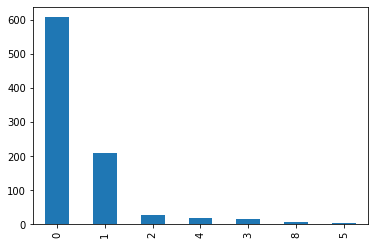

In [19]:
# of siblings / spouses aboard the Titanic
train.SibSp.value_counts().plot(kind='bar');

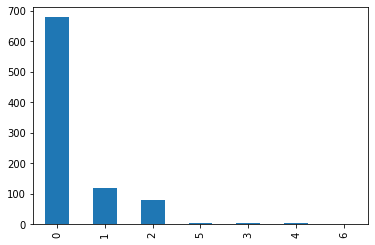

In [20]:
# of parents / children aboard the Titanic
train.Parch.value_counts().plot(kind='bar');

### Pclass and Embarked 

In [21]:
#Pclass by Embarked County
pd.crosstab(train.Pclass, train.Embarked)

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


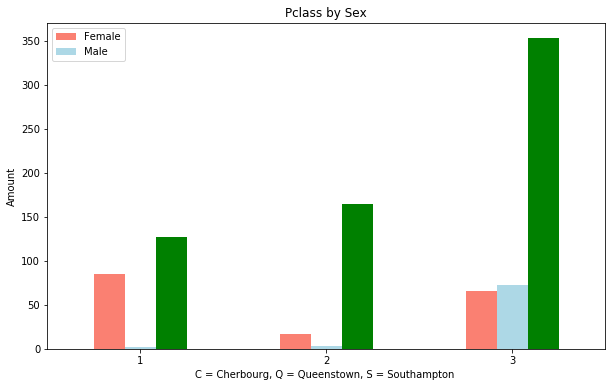

In [22]:
pd.crosstab(train.Pclass, train.Embarked).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['salmon', 'lightblue', 'green'])

plt.title("Pclass by Sex")
plt.xlabel("C = Cherbourg, Q = Queenstown, S = Southampton ")
plt.ylabel("Amount")
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

### Who paid the most by Age Group?

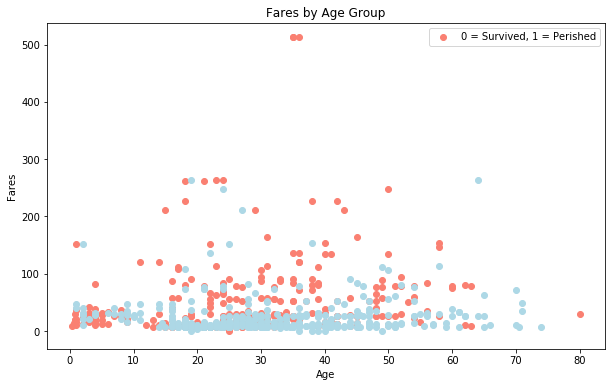

In [23]:
# create a figure
plt.figure(figsize = (10,6))

# scatter plot (Survived)
plt.scatter(train.Age[train.Survived==1],
           train.Fare[train.Survived==1],
           c='salmon')
# Scatter plot (Perished)
plt.scatter(train.Age[train.Survived==0],
           train.Fare[train.Survived==0],
           c='lightblue')

# Titles
plt.title('Fares by Age Group')
plt.xlabel('Age')
plt.ylabel('Fares')
plt.legend(["0 = Survived, 1 = Perished"]);

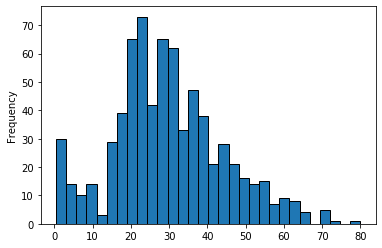

In [24]:
#Histogram of Age
train.Age.plot.hist(bins = 30, ec='black');

In [25]:
#Make Correlation matrix
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(7.5, -0.5)

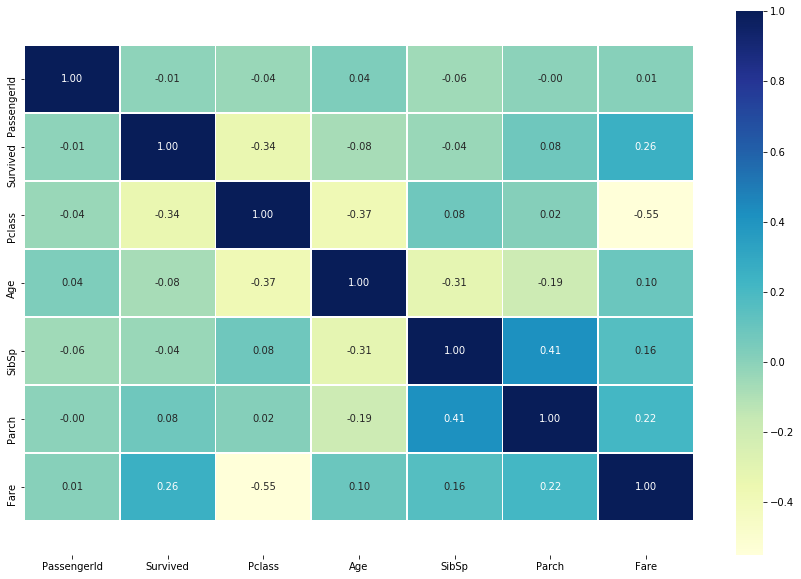

In [26]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Modeling

In [27]:
# Split data into X & y
X = train.drop(['Survived','Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], axis=1)
y = train['Survived']

X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [28]:
#create values/columns fill values
cat_imputer = SimpleImputer(strategy = 'constant', fill_value='missing')
num_cat_imputer = SimpleImputer(strategy='median')
num_imputer = SimpleImputer(strategy='median')

#define features
categorical_features = ['Sex', 'Embarked']
cat_num_features = ['Pclass', 'Fare']
numeric_features = ['Age']

#create imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, categorical_features),
    ('num_cat_imputer', num_cat_imputer, cat_num_features),
    ('num_imputer', num_imputer, numeric_features)
])

# Fill X value
fill_X = imputer.fit_transform(X)


#Check filled value
fill_X

array([['male', 'S', 3.0, 7.25, 22.0],
       ['female', 'C', 1.0, 71.2833, 38.0],
       ['female', 'S', 3.0, 7.925, 26.0],
       ...,
       ['female', 'S', 3.0, 23.45, 28.0],
       ['male', 'C', 1.0, 30.0, 26.0],
       ['male', 'Q', 3.0, 7.75, 32.0]], dtype=object)

In [29]:
#Transform array into dataframe 

train_fill_X = pd.DataFrame(fill_X,
                            columns = ['Sex', 'Embarked',  'Pclass',  'Fare','Age'])

In [30]:
# Hot encode categorical features
categorical_features = ['Sex', 'Embarked']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# fill X values
transformed_X = transformer.fit_transform(train_fill_X)



# check transformed_X
transformed_X

array([[0.0, 1.0, 0.0, ..., 3.0, 7.25, 22.0],
       [1.0, 0.0, 1.0, ..., 1.0, 71.2833, 38.0],
       [1.0, 0.0, 0.0, ..., 3.0, 7.925, 26.0],
       ...,
       [1.0, 0.0, 0.0, ..., 3.0, 23.45, 28.0],
       [0.0, 1.0, 1.0, ..., 1.0, 30.0, 26.0],
       [0.0, 1.0, 0.0, ..., 3.0, 7.75, 32.0]], dtype=object)

In [31]:
# Set random seed
np.random.seed(42)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

In [32]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Linear SVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "Random Forest": RandomForestClassifier(),
         "Gradient Booster": GradientBoostingClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(90)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [33]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

G:\Ana3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Ana3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
G:\Ana3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
G:\Ana3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.7988826815642458,
 'KNN': 0.7039106145251397,
 'Linear SVC': 0.8212290502793296,
 'SVC': 0.7039106145251397,
 'Random Forest': 0.7988826815642458,
 'Gradient Booster': 0.8268156424581006}

### Model Comparison


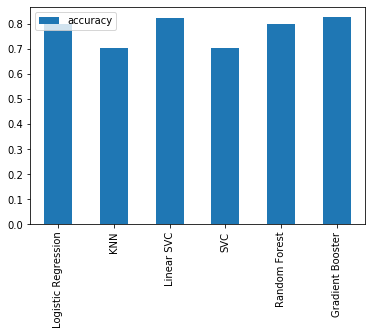

In [34]:
ml_comp = pd.DataFrame(model_scores, index=["accuracy"])
ml_comp.T.plot.bar();

## Hyperparameter tuning 

I am going to use:

    * Logistic Regression
    * Random Forest
    
Using RandomizedCV and GridsearchCV

In [35]:
log_grid = {"C": np.logspace(-4, 4, 60),
            "penalty": ['l1', 'l2'],
           "solver": ["liblinear"],
           "max_iter":np.arange(100, 100000, 20)}

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}


In [53]:
#tune Random Forest 

np.random.seed(80)

#setup hyperparameter search 

rs_reg = GridSearchCV(estimator=RandomForestClassifier(), param_grid=random_grid, scoring='accuracy', cv=2,n_jobs=-1)

#Fit random hyperparameter search model for Random Forest
rs_reg.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [54]:
# check the best parameter

rs_reg.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 130}

In [55]:
# Check accuracy 

rs_reg.score(X_test, y_test)

0.8268156424581006

# Submission

In [56]:
# Split data into X & y
features_drop = ['Name', 'Ticket', 'SibSp', 'Parch']
test_X = test.drop(features_drop, axis=1)

In [57]:
#create values/columns fill values
cat_imputer = SimpleImputer(strategy = 'constant', fill_value='missing')
num_cat_imputer = SimpleImputer(strategy='median')
num_imputer = SimpleImputer(strategy='median')

#define features
categorical_features = ['Sex', 'Embarked','PassengerId']
cat_num_features = ['Pclass', 'Fare']
numeric_features = ['Age']

#create imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, categorical_features),
    ('num_cat_imputer', num_cat_imputer, cat_num_features),
    ('num_imputer', num_imputer, numeric_features)
])

# Fill X value
filler_X = imputer.fit_transform(test_X)


#Check filled value
filler_X

array([['male', 'Q', 892, 3.0, 7.8292, 34.5],
       ['female', 'S', 893, 3.0, 7.0, 47.0],
       ['male', 'Q', 894, 2.0, 9.6875, 62.0],
       ...,
       ['male', 'S', 1307, 3.0, 7.25, 38.5],
       ['male', 'S', 1308, 3.0, 8.05, 27.0],
       ['male', 'C', 1309, 3.0, 22.3583, 27.0]], dtype=object)

In [72]:
#Transform array into dataframe 

test_fill_X = pd.DataFrame(filler_X,
                            columns = ['Sex', 'Embarked', 'Pclass', 'Fare', 'Age','PassengerId'])

In [73]:
# Hot encode categorical features
categorical_features = ['Sex', 'Embarked']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# fill X values
test_data = transformer.fit_transform(test_fill_X)



# check transformed_X
test_data

array([[0.0, 1.0, 0.0, ..., 3.0, 7.8292, 34.5],
       [1.0, 0.0, 0.0, ..., 3.0, 7.0, 47.0],
       [0.0, 1.0, 0.0, ..., 2.0, 9.6875, 62.0],
       ...,
       [0.0, 1.0, 0.0, ..., 3.0, 7.25, 38.5],
       [0.0, 1.0, 0.0, ..., 3.0, 8.05, 27.0],
       [0.0, 1.0, 1.0, ..., 3.0, 22.3583, 27.0]], dtype=object)

In [74]:
clf = RandomForestClassifier(n_estimators= 180,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'auto',
 max_depth= 50,
 bootstrap= True) 

clf.fit(X_train, y_train)

predicition = clf.predict(test_data)

In [75]:
submission = pd.DataFrame({"PassengerId": test['PassengerId'],
                          "Survived": predicition
                          })

submission.to_csv('submission.csv', index=False)

In [76]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [77]:
submission.head(50)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
